In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action =  'ignore')
import os

In [2]:
books = pd.read_csv(r"C:\Books_Recommender_System\books.csv", encoding='latin-1', sep = ';', error_bad_lines=False)
ratings = pd.read_csv(r"C:\Books_Recommender_System\ratings.csv", encoding='latin-1', sep = ';', error_bad_lines=False)
users = pd.read_csv(r"C:\Books_Recommender_System\users.csv", encoding='latin-1', sep = ';', error_bad_lines=False)

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9



In [3]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [4]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [5]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


#### Data Preprocessing and Cleaning

In [6]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


###### <font color='orange'> Things to note: The year of publication is an object and may need to be changed to a float/int.

In [8]:
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
books1 = books.dropna()
books1.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [11]:
books1.duplicated().sum()

0

In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [13]:
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [14]:
print(ratings.duplicated().sum())
ratings.isnull().sum()

0


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [16]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [17]:
print(users.duplicated().sum())
users.isnull().sum()

0


User-ID          0
Location         0
Age         110762
dtype: int64

In [18]:
users1 = users.dropna()
users1.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

#### EDA

In [19]:
ratings['Book-Rating'].value_counts().sort_values(ascending = False)

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

###### <font color='orange'> Book ratings range from 1-10. <br> - 716109 books received a rating of 0. <br> - 103736 books received a rating of 8.

In [20]:
merged_ratings = ratings.merge(books1, on ='ISBN')
merged_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031124,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031125,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031126,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031127,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [21]:
merged_ratings.groupby('Book-Title').count()

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Book-Title,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,4,4,4,4,4,4,4,4
Always Have Popsicles,1,1,1,1,1,1,1,1,1
Apple Magic (The Collector's series),1,1,1,1,1,1,1,1,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,1,1,1,1,1,1,1,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Ã?Â?lpiraten.,2,2,2,2,2,2,2,2,2
Ã?Â?rger mit Produkt X. Roman.,4,4,4,4,4,4,4,4,4
Ã?Â?sterlich leben.,1,1,1,1,1,1,1,1,1


#### Popularity Based Recommender System

In [22]:
book_data = merged_ratings[['User-ID', 'ISBN', 'Book-Title', 'Book-Rating', 'Book-Author']]
book_data

,User-ID,ISBN,Book-Title,Book-Rating,Book-Author
0,276725,034545104X,Flesh Tones: A Novel,0,M. J. Rose
1,2313,034545104X,Flesh Tones: A Novel,5,M. J. Rose
2,6543,034545104X,Flesh Tones: A Novel,0,M. J. Rose
3,8680,034545104X,Flesh Tones: A Novel,5,M. J. Rose
4,10314,034545104X,Flesh Tones: A Novel,9,M. J. Rose
...,...,...,...,...,...
1031124,276688,0517145553,Mostly Harmless,0,Douglas Adams
1031125,276688,1575660792,Gray Matter,7,Shirley Kennett
1031126,276690,0590907301,Triplet Trouble and the Class Trip (Triplet Tr...,0,Debbie Dadey
1031127,276704,0679752714,A Desert of Pure Feeling (Vintage Contemporaries),0,Judith Freeman


In [23]:
def popularity(train,title,ids):
    train_data_grouped = train.groupby([title])[ids].count().reset_index()  #user_id  #book title. Groupby book id and book title
    train_data_grouped.rename(columns = {ids: 'score'},inplace=True)
    train_data_sort = train_data_grouped.sort_values(['score',title], ascending = [0,1]) # sorting based on the number of times a book was read. score is the number of times a book was read
    train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') # create rank by sorting number of books being read
    popularity_recommendations = train_data_sort.head(10) # print top 10
    return popularity_recommendations

In [24]:
popularity(book_data, 'Book-Title', 'User-ID')

,Book-Title,score,Rank
234946,Wild Animus,2502,1.0
196322,The Lovely Bones: A Novel,1295,2.0
183569,The Da Vinci Code,898,3.0
5303,A Painted House,838,4.0
199233,The Nanny Diaries: A Novel,828,5.0
27922,Bridget Jones's Diary,815,6.0
206498,The Secret Life of Bees,774,7.0
52981,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,8.0
204383,The Red Tent (Bestselling Backlist),723,9.0
14392,Angels &amp; Demons,670,10.0


###### <font color = 'orange'> Based on the popularity system, Wild Animus would be the most recommended/popular book because it was read 2502 times.

#### Collaborative Recommender System

In [25]:
ratings['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

###### <font color ='orange'> User 11676 has rated/reviewed 13602 books

In [26]:
ratings['User-ID'].unique().shape

(105283,)

###### <font color ='orange'> 105283 users left a rating for a book but to get the most out of the collaborative system, it would be better to focus on users who have rated 200 books or more.

In [27]:
x = ratings['User-ID'].value_counts() > 200

In [28]:
x[x].shape

(899,)

###### <font color ='orange'> 899 users have rated over 200 books.

In [29]:
y = x[x].index

In [30]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [31]:
ratings = ratings[ratings['User-ID'].isin(y)]

###### <font color = 'orange'> Users who have rated more than 200 books are stored in the variable ratings.

In [32]:
ratings.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [33]:
ratings.shape

(526356, 3)

In [34]:
merged_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [35]:
merged_ratings = merged_ratings[['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-L']]

In [36]:
merged_ratings.shape

(1031129, 8)

In [37]:
num_of_ratings = merged_ratings.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_of_ratings
#number of ratings for each book

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241061,Ã?Â?lpiraten.,2
241062,Ã?Â?rger mit Produkt X. Roman.,4
241063,Ã?Â?sterlich leben.,1
241064,Ã?Â?stlich der Berge.,3


###### <font color = 'orange'> This list conveys the number of ratings a book received.

In [38]:
num_of_ratings.rename(columns={'Book-Rating': 'num_of_ratings'}, inplace = True)

In [39]:
num_of_ratings

,Book-Title,num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241061,Ã?Â?lpiraten.,2
241062,Ã?Â?rger mit Produkt X. Roman.,4
241063,Ã?Â?sterlich leben.,1
241064,Ã?Â?stlich der Berge.,3


In [40]:
final = merged_ratings.merge(num_of_ratings, on = 'Book-Title')

In [41]:
final.shape

(1031129, 9)

In [42]:
final = final[final['num_of_ratings']>= 50]

In [43]:
final

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,num_of_ratings
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
...,...,...,...,...,...,...,...,...,...
730559,227447,0061092096,0,Love in Another Town,Barbara Taylor Bradford,1996,HarperTorch,http://images.amazon.com/images/P/0061092096.0...,68
730560,231210,0061092096,0,Love in Another Town,Barbara Taylor Bradford,1996,HarperTorch,http://images.amazon.com/images/P/0061092096.0...,68
730561,238781,0061092096,5,Love in Another Town,Barbara Taylor Bradford,1996,HarperTorch,http://images.amazon.com/images/P/0061092096.0...,68
730562,244349,0061092096,0,Love in Another Town,Barbara Taylor Bradford,1996,HarperTorch,http://images.amazon.com/images/P/0061092096.0...,68


In [44]:
final.shape

(288740, 9)

In [45]:
final.drop_duplicates(['User-ID', 'Book-Title'], inplace = True)

In [46]:
final.shape

(285518, 9)

In [47]:
# Visualize the top ten books with the most ratings
#final['num_of ratings'].value_counts(ascending = False).head(10)
graph = final.groupby('Book-Title')['num_of_ratings'].count().sort_values(ascending = False).head(10)

Text(0.5, 1.0, 'Books with the highest number of ratings')

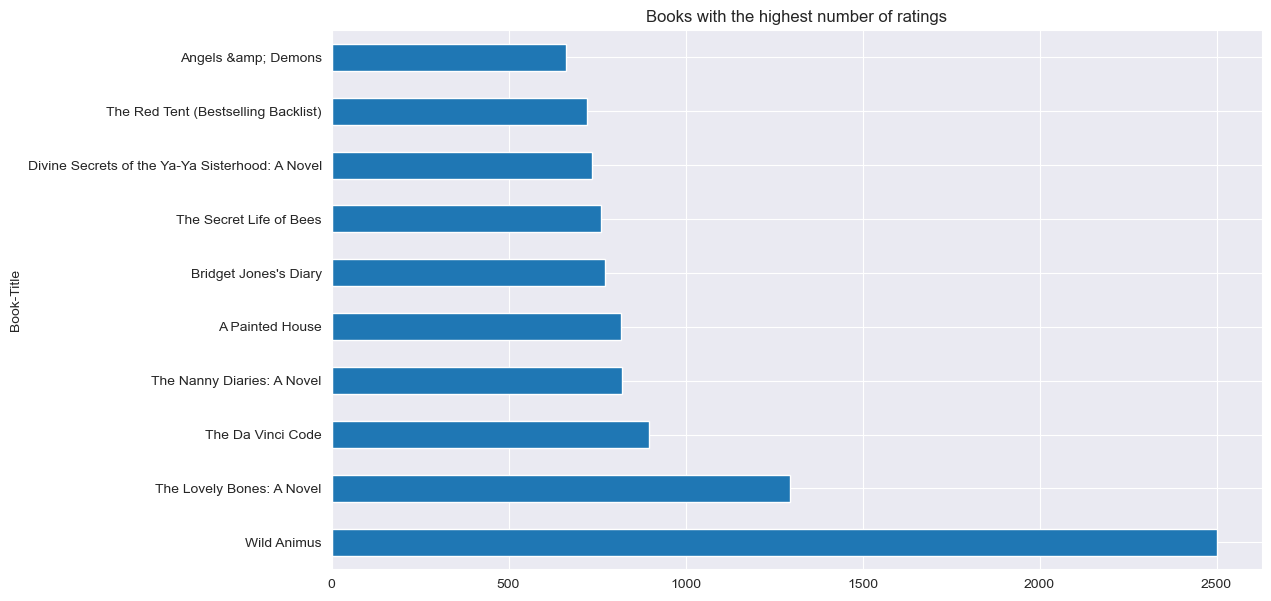

In [48]:
plt.figure(figsize=(12, 7))
graph.plot(kind = 'barh')
plt.title('Books with the highest number of ratings')

In [49]:
book_pivtable = final.pivot_table(index=['Book-Title'], columns=['User-ID'], values=['Book-Rating'])

In [50]:
book_pivtable

Book-Rating                \
User-ID                                                 8      9      14       
Book-Title                                                                     
10 Lb. Penalty                                             NaN    NaN    NaN   
16 Lighthouse Road                                         NaN    NaN    NaN   
1984                                                       NaN    NaN    NaN   
1st to Die: A Novel                                        NaN    NaN    NaN   
2010: Odyssey Two                                          NaN    NaN    NaN   
...                                                        ...    ...    ...   
Zen and the Art of Motorcycle Maintenance: An I...         NaN    NaN    NaN   
Zoya                                                       NaN    NaN    NaN   
\O\" Is for Outlaw"                                        NaN    NaN    NaN   
\Surely You're Joking, Mr. Feynman!\": Adventur...         NaN    NaN    NaN   
stardust                                                   NaN    NaN    NaN   

                                                                         \
User-ID                                            16     17     19       
Book-Title                                                                
10 Lb. Penalty                                        NaN    NaN    NaN   
16 Lighthouse Road                                    NaN    NaN    NaN   
1984                                                  NaN    NaN    NaN   
1st to Die: A Novel                                   NaN    NaN    NaN   
2010: Odyssey Two                                     NaN    NaN    NaN   
...                                                   ...    ...    ...   
Zen and the Art of Motorcycle Maintenance: An I...    NaN    NaN    NaN   
Zoya                                                  NaN    NaN    NaN   
\O\" Is for Outlaw"                                   NaN    NaN    NaN   
\Surely You're Joking, Mr. Feynman!\": Adventur...    NaN    NaN    NaN   
stardust                                              NaN    NaN    NaN   

                                                                         \
User-ID                                            23     26     32       
Book-Title                                                                
10 Lb. Penalty                                        NaN    NaN    NaN   
16 Lighthouse Road                                    NaN    NaN    NaN   
1984                                                  NaN    NaN    NaN   
1st to Die: A Novel                                   NaN    NaN    NaN   
2010: Odyssey Two                                     NaN    NaN    NaN   
...                                                   ...    ...    ...   
Zen and the Art of Motorcycle Maintenance: An I...    NaN    NaN    NaN   
Zoya                                                  NaN    NaN    NaN   
\O\" Is for Outlaw"                                   NaN    NaN    NaN   
\Surely You're Joking, Mr. Feynman!\": Adventur...    NaN    NaN    NaN   
stardust                                              NaN    NaN    NaN   

                                                           ...                \
User-ID                                            39      ... 278820 278824   
Book-Title                                                 ...                 
10 Lb. Penalty                                        NaN  ...    NaN    NaN   
16 Lighthouse Road                                    NaN  ...    NaN    NaN   
1984                                                  NaN  ...    NaN    NaN   
1st to Die: A Novel                                   NaN  ...    NaN    NaN   
2010: Odyssey Two                                     NaN  ...    NaN    NaN   
...                                                   ...  ...    ...    ...   
Zen and the Art of Motorcycle Maintenance: An I...    NaN  ...    NaN    NaN   
Zoya                        

In [51]:
book_pivtable.fillna(0, inplace = True)

In [52]:
book_pivtable

Book-Rating                \
User-ID                                                 8      9      14       
Book-Title                                                                     
10 Lb. Penalty                                             0.0    0.0    0.0   
16 Lighthouse Road                                         0.0    0.0    0.0   
1984                                                       0.0    0.0    0.0   
1st to Die: A Novel                                        0.0    0.0    0.0   
2010: Odyssey Two                                          0.0    0.0    0.0   
...                                                        ...    ...    ...   
Zen and the Art of Motorcycle Maintenance: An I...         0.0    0.0    0.0   
Zoya                                                       0.0    0.0    0.0   
\O\" Is for Outlaw"                                        0.0    0.0    0.0   
\Surely You're Joking, Mr. Feynman!\": Adventur...         0.0    0.0    0.0   
stardust                                                   0.0    0.0    0.0   

                                                                         \
User-ID                                            16     17     19       
Book-Title                                                                
10 Lb. Penalty                                        0.0    0.0    0.0   
16 Lighthouse Road                                    0.0    0.0    0.0   
1984                                                  0.0    0.0    0.0   
1st to Die: A Novel                                   0.0    0.0    0.0   
2010: Odyssey Two                                     0.0    0.0    0.0   
...                                                   ...    ...    ...   
Zen and the Art of Motorcycle Maintenance: An I...    0.0    0.0    0.0   
Zoya                                                  0.0    0.0    0.0   
\O\" Is for Outlaw"                                   0.0    0.0    0.0   
\Surely You're Joking, Mr. Feynman!\": Adventur...    0.0    0.0    0.0   
stardust                                              0.0    0.0    0.0   

                                                                         \
User-ID                                            23     26     32       
Book-Title                                                                
10 Lb. Penalty                                        0.0    0.0    0.0   
16 Lighthouse Road                                    0.0    0.0    0.0   
1984                                                  0.0    0.0    0.0   
1st to Die: A Novel                                   0.0    0.0    0.0   
2010: Odyssey Two                                     0.0    0.0    0.0   
...                                                   ...    ...    ...   
Zen and the Art of Motorcycle Maintenance: An I...    0.0    0.0    0.0   
Zoya                                                  0.0    0.0    0.0   
\O\" Is for Outlaw"                                   0.0    0.0    0.0   
\Surely You're Joking, Mr. Feynman!\": Adventur...    0.0    0.0    0.0   
stardust                                              0.0    0.0    0.0   

                                                           ...                \
User-ID                                            39      ... 278820 278824   
Book-Title                                                 ...                 
10 Lb. Penalty                                        0.0  ...    0.0    0.0   
16 Lighthouse Road                                    0.0  ...    0.0    0.0   
1984                                                  0.0  ...    0.0    0.0   
1st to Die: A Novel                                   0.0  ...    0.0    0.0   
2010: Odyssey Two                                     0.0  ...    0.0    0.0   
...                                                   ...  ...    ...    ...   
Zen and the Art of Motorcycle Maintenance: An I...    0.0  ...    0.0    0.0   
Zoya                        

In [53]:
from scipy.sparse import csr_matrix

In [54]:
book_sparse = csr_matrix(book_pivtable)

In [55]:
book_sparse
# removes zeros from the pivot table

<2444x47994 sparse matrix of type '<class 'numpy.float64'>'
	with 113444 stored elements in Compressed Sparse Row format>

In [56]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [57]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [58]:
distance, suggestion = model.kneighbors(book_pivtable.iloc[34,:].values.reshape(1, -1), n_neighbors=6)

In [59]:
distance

array([[ 0.        , 44.15880433, 44.33959855, 45.033321  , 45.18849411,
        45.39823785]])

###### <font color = 'orange'> Distance represents the distance between the selected book and the recommended book based on the selected book.

In [60]:
suggestion

array([[  34,  770,   65, 1713,   99, 1581]], dtype=int64)

In [61]:
for i in range(len(suggestion)):
    print(book_pivtable.index[suggestion][i])

['A Heartbreaking Work Of Staggering Genius : A Memoir Based on a True Story'
 'Ground Zero and Beyond' 'A Secret Affair' 'The Blooding' 'About Face'
 'Ssn']


In [62]:
book_names = book_pivtable.index

In [63]:
import pickle
pickle.dump(model, open('book_recommender.pkl', 'wb'))
pickle.dump(book_names, open('book_titles.pkl', 'wb'))
pickle.dump(final, open('final.pkl', 'wb'))
pickle.dump(book_pivtable, open('book_pivot.pkl', 'wb'))

In [64]:
def book_recommender(book_name):
    book_id = np.where(book_pivtable.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivtable.iloc[book_id,:].values.reshape(1, -1), n_neighbors=6)

    for i in range(len(suggestion)):
        books = book_pivtable.index[suggestion[i]]
        for j in books:
            print(j)

In [65]:
book_name = 'Wuthering Heights'
book_recommender(book_name)

Wuthering Heights
Ground Zero and Beyond
A Secret Affair
Women in His Life
Whirlwind
The Blooding
